This analysis was conducted to understand the relationship between customer attributes and product purchasing behavior.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-data/ifood_df.csv
/kaggle/input/marketing-data/dictionary.png


In [2]:
data1= pd.read_csv("../input/marketing-data/ifood_df.csv")

In [3]:
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
from numpy import std
from numpy import median
from numpy import nan as NA
import matplotlib as plt
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
from matplotlib import cm
import missingno as msno 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import scipy as scipy
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_ind, ttest_rel
import math
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import random
import statsmodels.api as sm

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
%matplotlib inline
plt.close("all")
data1.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
type(data1.values)

numpy.ndarray

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
data1.index.names

FrozenList([None])

In [8]:
data1.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [9]:
dataT=data1.T

In [10]:
dataT.iloc[26:31, 0:2205].duplicated().sum()

0

In [11]:
dataT.iloc[31:36, 0:2205].duplicated().sum()

0

In [12]:
plot_all1 =data1[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'  ]]

plot_all2=data1[[ 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall']]

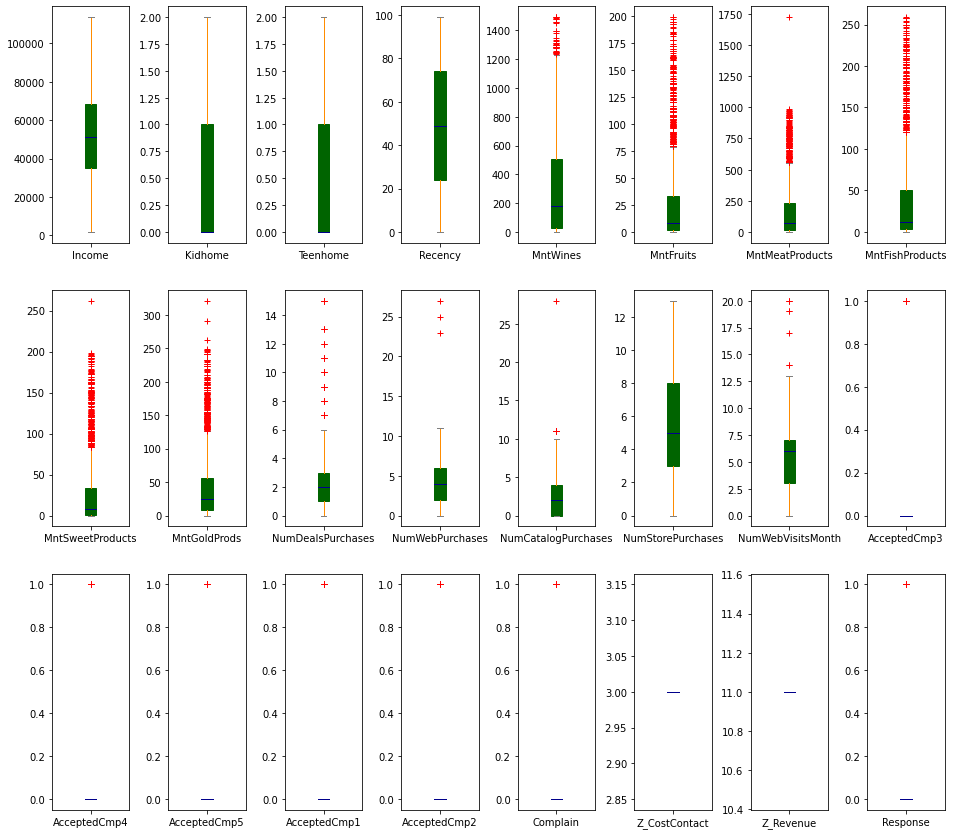

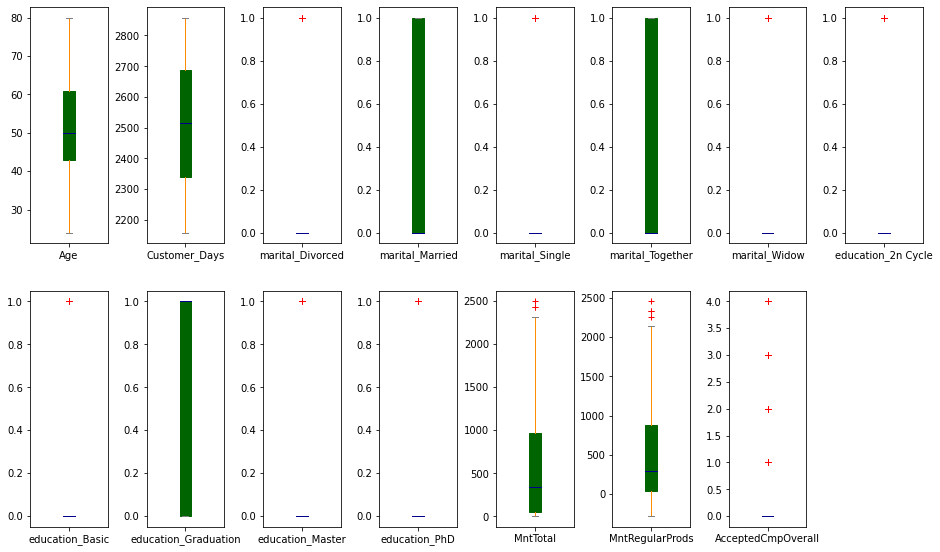

In [13]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
plot_all1.plot(subplots=True, layout=(4,8), kind='box', color=color,  sym="r+", figsize=(16,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);
plot_all2.plot(subplots=True, layout=(4,8), kind='box', color=color, sym="r+", figsize=(16,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

24

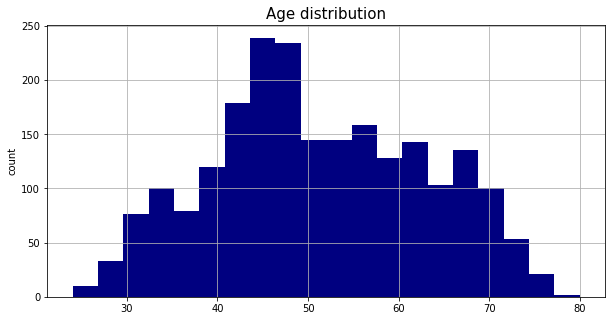

In [14]:
data1.Age.hist(bins=20, color="navy", figsize=(10,5))
plt.title('Age distribution', size=15)
plt.ylabel('count');
data1.Age.min()

1730.0

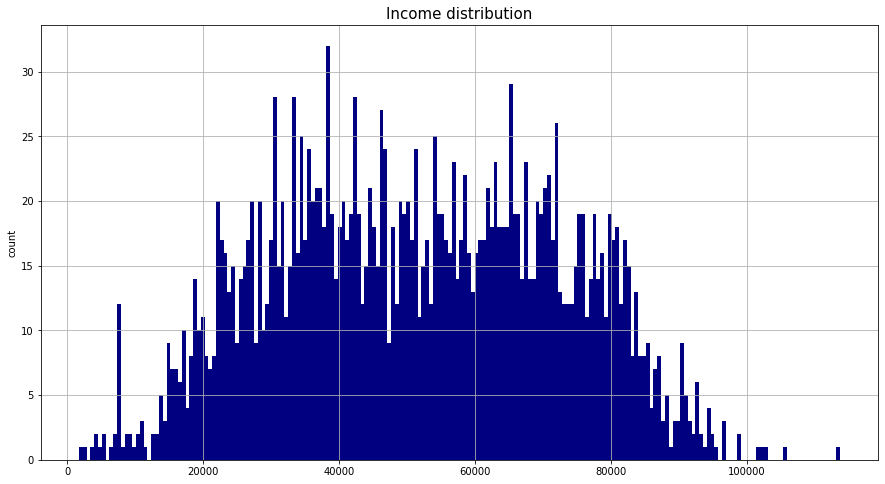

In [15]:
data1.Income.hist(bins=200, color="navy", figsize=(15,8))
plt.title('Income distribution', size=15)
plt.ylabel('count');
data1.Income.min()

In [16]:
Q1 = data1.Income.quantile(0.25)
Q1 = data1.Income.quantile(0.25)
Q2 = data1.Income.quantile(0.50)
Q3 = data1.Income.quantile(0.75)
IQR = Q3 - Q1

In [17]:
Q1

35196.0

In [18]:
Q3

68281.0

In [19]:
lowerbound=1.5*IQR - Q1
higherbound=1.5*IQR +Q3

In [20]:
data1.loc[data1["Income"]<lowerbound, "Income"] =lowerbound
data1.loc[data1["Income"]>higherbound, "Income"] =higherbound

14431.5

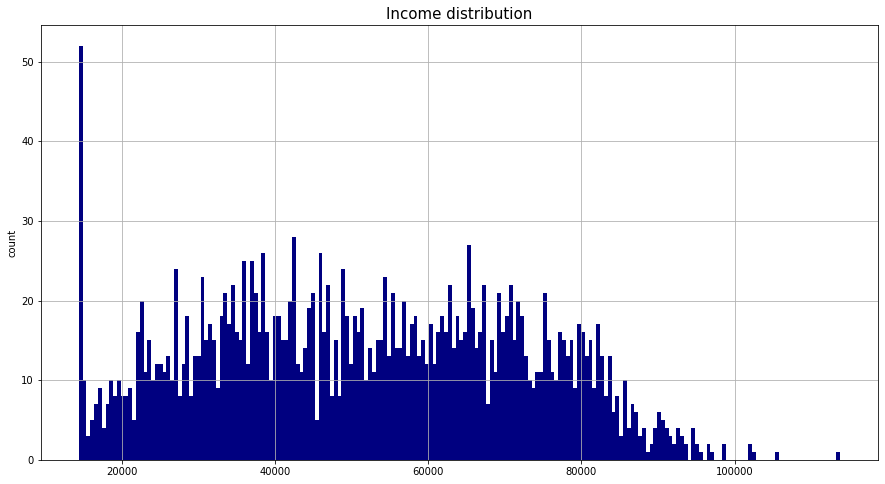

In [21]:
data1.Income.hist(bins=200, color="navy", figsize=(15,8))
plt.title('Income distribution', size=15)
plt.ylabel('count');
data1.Income.min()

In [22]:
data1.rename(columns={'NumDealsPurchases':'deals_purchases', 'NumWebPurchases':'web_purchases',
                      'NumCatalogPurchases':'catalog_purcaheses', 'NumStorePurchases':'store_purchases', 
                      'NumWebVisitsMonth':'web_visit_month','AcceptedCmp3':'accepted_cmp_3', 'AcceptedCmp4':'accepted_cmp_4','Recency':'recency','Customer_Days':'customer_days',
                      'AcceptedCmp5':'accepted_cmp_5', 'AcceptedCmp1':'accepted_cmp_1', 'AcceptedCmp2':'accepted_cmp_2',
                      'Complain':'complain', 'Z_CostContact':'z_cost_contact', 'Z_Revenue':'z_revenue', 'marital_Divorced':'divorced', 'marital_Married':'married',
                      'marital_Single':'single', 'marital_Together':'together', 'marital_Widow':'widow',
                      'Response':'cust_response','MntTotal':'total_purchase', 'MntRegularProds':'regular_products',
                      'AcceptedCmpOverall':'accepted_cmp_overall','Income':'income','MntWines': 'wines',
                      'MntFruits':'fruits','MntMeatProducts':'meat','MntFishProducts':'fish','MntSweetProducts':'sweet',
                      'MntGoldProds':'gold','education_2n Cycle':'e_second_cycle', 'education_Basic':'e_basic', 
                      'education_Graduation':'e_graduation', 'education_Master':'e_master', 'education_PhD':'e_phd','Age':'age','Kidhome':'kidhome','Teenhome':'teenhome'}, inplace=True)


I make some new cols for some combined analysis

In [23]:
data1['child_st'] = np.where(data1.kidhome+data1.teenhome>0, 'with_child', 'none_child')
data1['child_total']=data1['kidhome']+data1['teenhome']


In [24]:
data1['e_second_cyclecopy']=np.where(data1.e_second_cycle>0, 'e_second_cycle', 0)
data1['e_basiccopy']=np.where(data1.e_basic>0, 'e_basic', 0)
data1['e_graduationcopy']=np.where(data1.e_graduation>0, 'e_graduation', 0)
data1['e_mastercopy']=np.where(data1.e_master>0, 'e_master', 0)
data1['e_phdcopy']=np.where(data1.e_phd>0, 'e_phd', 0)



data1['divorcedcopy']=np.where(data1.divorced>0, 'divorced', 0)
data1['marriedcopy']=np.where(data1.married>0, 'married', 0)
data1['singlecopy']=np.where(data1.single>0, 'single', 0)
data1['togethercopy']=np.where(data1.together>0, 'together', 0)
data1['widowcopy']=np.where(data1.widow>0, 'widow', 0)





In [25]:
marital1=data1
marital1=marital1[(marital1.marriedcopy=="married")]
marital1.drop(columns=['divorcedcopy','singlecopy', 'togethercopy', 'widowcopy' ], inplace=True)
marital1.rename(columns={"marriedcopy":"marital_st"} , inplace=True)

marital2=data1
marital2=marital2[(marital2.divorcedcopy=="divorced")]
marital2.drop(columns=['marriedcopy','singlecopy', 'togethercopy', 'widowcopy' ], inplace=True)
marital2.rename(columns={"divorcedcopy":"marital_st"} , inplace=True)

marital3=data1
marital3=marital3[(marital3.singlecopy=="single")]
marital3.drop(columns=['marriedcopy','divorcedcopy', 'togethercopy', 'widowcopy' ], inplace=True)
marital3.rename(columns={"singlecopy":"marital_st"} , inplace=True)

marital4=data1
marital4=marital4[(marital4.widowcopy=="widow")]
marital4.drop(columns=['marriedcopy','divorcedcopy', 'togethercopy', 'singlecopy' ], inplace=True)
marital4.rename(columns={"widowcopy":"marital_st"} , inplace=True)

marital5=data1
marital5=marital5[(marital5.togethercopy=="together")]
marital5.drop(columns=['marriedcopy','divorcedcopy', 'widowcopy', 'singlecopy' ], inplace=True)
marital5.rename(columns={"togethercopy":"marital_st"} , inplace=True)


In [26]:
frames=[marital1, marital2, marital3, marital4, marital5]

In [27]:
pd.concat(frames)

,income,kidhome,teenhome,recency,wines,fruits,meat,fish,sweet,gold,...,regular_products,accepted_cmp_overall,child_st,child_total,e_second_cyclecopy,e_basiccopy,e_graduationcopy,e_mastercopy,e_phdcopy,marital_st
4,58293.0,1,0,94,173,43,118,46,27,15,...,392,0,with_child,1,0,0,0,0,e_phd,married
7,33454.0,1,0,32,76,10,56,3,1,23,...,123,0,with_child,1,0,0,0,0,e_phd,married
10,14431.5,0,0,59,6,16,11,11,1,16,...,29,0,none_child,0,0,e_basic,0,0,0,married
13,17323.0,0,0,38,3,14,17,6,1,5,...,36,0,none_child,0,0,0,e_graduation,0,0,married
15,41850.0,1,1,51,53,5,19,2,13,4,...,88,0,with_child,2,0,0,e_graduation,0,0,married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,40101.0,1,0,73,171,3,129,26,24,62,...,291,0,with_child,1,0,0,0,e_master,0,together
2189,14431.5,1,0,7,2,8,11,3,8,21,...,11,0,with_child,1,e_second_cycle,0,0,0,0,together
2192,58554.0,1,1,55,368,24,68,38,0,88,...,410,0,with_child,2,0,0,e_graduation,0,0,together
2201,64014.0,2,1,56,406,0,30,0,0,8,...,428,1,with_child,3,0,0,0,0,e_phd,together


In [28]:
marital=pd.concat(frames)

In [29]:
data1=marital

In [30]:
edu1=data1
edu1=edu1[(edu1.e_second_cyclecopy=="e_second_cycle")]
edu1.drop(columns=['e_basiccopy', 'e_graduationcopy', 'e_mastercopy', 'e_phdcopy', ], inplace=True)
edu1.rename(columns={"e_second_cyclecopy":"education_st"} , inplace=True)

edu2=data1
edu2=edu2[(edu2.e_basiccopy=="e_basic")]
edu2.drop(columns=['e_second_cyclecopy', 'e_graduationcopy', 'e_mastercopy', 'e_phdcopy', ], inplace=True)
edu2.rename(columns={"e_basiccopy":"education_st"} , inplace=True)

edu3=data1
edu3=edu3[(edu3.e_graduationcopy=="e_graduation")]
edu3.drop(columns=['e_second_cyclecopy', 'e_basiccopy', 'e_mastercopy', 'e_phdcopy', ], inplace=True)
edu3.rename(columns={"e_graduationcopy":"education_st"} , inplace=True)

edu4=data1
edu4=edu4[(edu4.e_mastercopy=="e_master")]
edu4.drop(columns=['e_second_cyclecopy', 'e_basiccopy', 'e_graduationcopy', 'e_phdcopy', ], inplace=True)
edu4.rename(columns={"e_mastercopy":"education_st"} , inplace=True)

edu5=data1
edu5=edu5[(edu5.e_phdcopy=="e_phd")]
edu5.drop(columns=['e_second_cyclecopy', 'e_basiccopy', 'e_graduationcopy', 'e_mastercopy' ], inplace=True)
edu5.rename(columns={"e_phdcopy":"education_st"} , inplace=True)



In [31]:
framee=[edu1, edu2, edu3, edu4, edu5]

In [32]:
pd.concat(framee)

,income,kidhome,teenhome,recency,wines,fruits,meat,fish,sweet,gold,...,e_graduation,e_master,e_phd,total_purchase,regular_products,accepted_cmp_overall,child_st,child_total,education_st,marital_st
35,23718.0,1,0,76,6,3,14,15,7,36,...,0,0,0,45,9,0,with_child,1,e_second_cycle,married
43,14431.5,0,0,24,3,18,14,15,22,50,...,0,0,0,72,22,0,none_child,0,e_second_cycle,married
76,23559.0,1,0,87,25,5,19,7,0,23,...,0,0,0,56,33,0,with_child,1,e_second_cycle,married
89,78497.0,0,0,44,207,26,447,75,0,223,...,0,0,0,755,532,1,none_child,0,e_second_cycle,married
108,36550.0,1,0,74,47,90,94,123,103,120,...,0,0,0,457,337,0,with_child,1,e_second_cycle,married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,69805.0,0,1,50,750,71,174,13,10,20,...,0,0,1,1018,998,0,with_child,1,e_phd,together
2096,65220.0,0,0,3,890,63,292,0,25,12,...,0,0,1,1270,1258,0,none_child,0,e_phd,together
2113,29732.0,1,0,23,25,0,8,0,1,4,...,0,0,1,34,30,0,with_child,1,e_phd,together
2115,63516.0,1,1,30,141,11,114,15,14,5,...,0,0,1,295,290,0,with_child,2,e_phd,together


In [33]:
edubi=pd.concat(framee)

In [34]:
data1=edubi

In [35]:
data1['education_band'] = data1['education_st'].replace({'e_second_cycle':2, 'e_basic':1, 'e_graduation':3, 'e_master':4, 'e_phd':5})
data1['marital_band']= data1['marital_st'].replace({'married':1,'together':2,'widow':3,'single':4,'divorced':5})
data1['education_band'] = data1['education_band'].astype(int)
data1['marital_band'] = data1['marital_band'].astype(int)
data1['child_st'] = data1['child_st'].astype('object')
data1['marital_st'] = data1["marital_st"].astype("object")
data1['education_st'] = data1['education_st'].astype('object')

In [36]:
data1["marital_short"]=data1["marital_st"].replace({'divorced':'nonrelation','single':'nonrelation','married':'in_relation','together':'in_relation','widow':'nonrelation'})
data1['marital_short'] = data1["marital_short"].astype("object")

In [37]:
data1['marital_child'] = data1['marital_short'].astype(str)+'_'+data1['child_st']
data1['marital_child'] = data1["marital_child"].astype("object")

In [38]:
age_group = (20,25,30,35,40,45,50,55,60,65,70,75,80)
data1['age_group']=pd.cut(x =data1.age, bins = age_group)

In [39]:
age_band = (20,25,30,35,40,45,50,55,60,65,70,75,80 )
pd.cut(x =data1.age, bins = age_band)
data1['age_band']=pd.cut(x =data1.age, bins = age_band, labels = [1,2,3,4,5,6,7,8,9,10,11,12 ])

In [40]:
data1["income_group"]=pd.cut(data1["income"],10)

In [41]:
data1.income_group.unique()

[(14332.198, 24361.75], (74013.0, 83943.25], (34292.0, 44222.25], (64082.75, 74013.0], (24361.75, 34292.0], (54152.5, 64082.75], (44222.25, 54152.5], (83943.25, 93873.5], (93873.5, 103803.75], (103803.75, 113734.0]]
Categories (10, interval[float64, right]): [(14332.198, 24361.75] < (24361.75, 34292.0] < (34292.0, 44222.25] < (44222.25, 54152.5] ... (74013.0, 83943.25] < (83943.25, 93873.5] < (93873.5, 103803.75] < (103803.75, 113734.0]]

In [42]:
income_band = ( 14332.198, 24361.75, 34292.0, 44222.25,54152.5, 64082.75,74013.0, 83943.25,93873.5, 103803.75,113734.0    )
pd.cut(x =data1.income, bins = income_band)
data1['income_band']=pd.cut(x =data1.income, bins = income_band, labels = [1,2,3,4,5,6,7,8,9,10 ])

In [43]:
data1['income_band'] = data1['income_band'].astype(int)
data1['age_band'] = data1['age_band'].astype(int)


In [44]:
data1['marital_child_education'] = data1['marital_child'].astype(str)+'_'+data1['education_st']



In [45]:
data1.marital_child_education.unique()

array(['in_relation_with_child_e_second_cycle',
       'in_relation_none_child_e_second_cycle',
       'nonrelation_with_child_e_second_cycle',
       'nonrelation_none_child_e_second_cycle',
       'in_relation_none_child_e_basic', 'in_relation_with_child_e_basic',
       'nonrelation_with_child_e_basic', 'nonrelation_none_child_e_basic',
       'in_relation_none_child_e_graduation',
       'in_relation_with_child_e_graduation',
       'nonrelation_with_child_e_graduation',
       'nonrelation_none_child_e_graduation',
       'in_relation_with_child_e_master',
       'in_relation_none_child_e_master',
       'nonrelation_with_child_e_master',
       'nonrelation_none_child_e_master', 'in_relation_with_child_e_phd',
       'in_relation_none_child_e_phd', 'nonrelation_with_child_e_phd',
       'nonrelation_none_child_e_phd'], dtype=object)

In [46]:
data1["marital_child_edu_band"]=data1["marital_child_education"].replace({'in_relation_none_child_e_second_cycle':1,
       'in_relation_with_child_e_second_cycle':2,
       'nonrelation_none_child_e_second_cycle':3,
       'nonrelation_with_child_e_second_cycle':4,
       'in_relation_none_child_e_graduation':5,
       'in_relation_with_child_e_graduation':6,
       'nonrelation_none_child_e_graduation':7,
       'nonrelation_with_child_e_graduation':8,
       'in_relation_with_child_e_master':9,
       'in_relation_none_child_e_master':10,
       'nonrelation_with_child_e_master':11,
       'nonrelation_none_child_e_master':12, 'in_relation_none_child_e_phd':13,
       'in_relation_with_child_e_phd':14, 'nonrelation_none_child_e_phd': 15,
       'nonrelation_with_child_e_phd':16, 'in_relation_none_child_e_basic':17,
       'in_relation_with_child_e_basic':18,'nonrelation_with_child_e_basic':19, 'nonrelation_none_child_e_basic':20})

In [47]:
data1.marital_child_edu_band.unique()

array([ 2,  1,  4,  3, 17, 18, 19, 20,  5,  6,  8,  7,  9, 10, 11, 12, 14,
       13, 16, 15])

In [48]:
data1["band1"]=np.where(data1.marital_child_edu_band==1, 1,0)
data1["band2"]=np.where(data1.marital_child_edu_band==2, 1,0)                        
data1["band3"]=np.where(data1.marital_child_edu_band==3, 1,0)                        
data1["band4"]=np.where(data1.marital_child_edu_band==4, 1,0)
data1["band5"]=np.where(data1.marital_child_edu_band==5, 1,0)
data1["band6"]=np.where(data1.marital_child_edu_band==6, 1,0)
data1["band7"]=np.where(data1.marital_child_edu_band==7, 1,0)
data1["band8"]=np.where(data1.marital_child_edu_band==8, 1,0)
data1["band9"]=np.where(data1.marital_child_edu_band==9, 1,0)
data1["band10"]=np.where(data1.marital_child_edu_band==10, 1,0)
data1["band11"]=np.where(data1.marital_child_edu_band==11, 1,0)
data1["band12"]=np.where(data1.marital_child_edu_band==12, 1,0)
data1["band13"]=np.where(data1.marital_child_edu_band==13, 1,0)
data1["band14"]=np.where(data1.marital_child_edu_band==14, 1,0)
data1["band15"]=np.where(data1.marital_child_edu_band==15, 1,0)
data1["band16"]=np.where(data1.marital_child_edu_band==16, 1,0)
data1["band17"]=np.where(data1.marital_child_edu_band==17, 1,0)
data1["band18"]=np.where(data1.marital_child_edu_band==18, 1,0)
data1["band19"]=np.where(data1.marital_child_edu_band==19, 1,0)
data1["band20"]=np.where(data1.marital_child_edu_band==20, 1,0)
                        


In [49]:
data1["income_band1"]=np.where(data1.income_band==1, 1,0)
data1["income_band2"]=np.where(data1.income_band==2, 1,0)                        
data1["income_band3"]=np.where(data1.income_band==3, 1,0)                        
data1["income_band4"]=np.where(data1.income_band==4, 1,0)
data1["income_band5"]=np.where(data1.income_band==5, 1,0)
data1["income_band6"]=np.where(data1.income_band==6, 1,0)
data1["income_band7"]=np.where(data1.income_band==7, 1,0)
data1["income_band8"]=np.where(data1.income_band==8, 1,0)
data1["income_band9"]=np.where(data1.income_band==9, 1,0)
data1["income_band10"]=np.where(data1.income_band==10, 1,0)

                        


In [50]:
data1["age_band1"]=np.where(data1.age_band==1, 1,0)
data1["age_band2"]=np.where(data1.age_band==2, 1,0)                        
data1["age_band3"]=np.where(data1.age_band==3, 1,0)                        
data1["age_band4"]=np.where(data1.age_band==4, 1,0)
data1["age_band5"]=np.where(data1.age_band==5, 1,0)
data1["age_band6"]=np.where(data1.age_band==6, 1,0)
data1["age_band7"]=np.where(data1.age_band==7, 1,0)
data1["age_band8"]=np.where(data1.age_band==8, 1,0)
data1["age_band9"]=np.where(data1.age_band==9, 1,0)
data1["age_band10"]=np.where(data1.age_band==10, 1,0)
data1["age_band11"]=np.where(data1.age_band==11, 1,0)
data1["age_band12"]=np.where(data1.age_band==12, 1,0)
                        


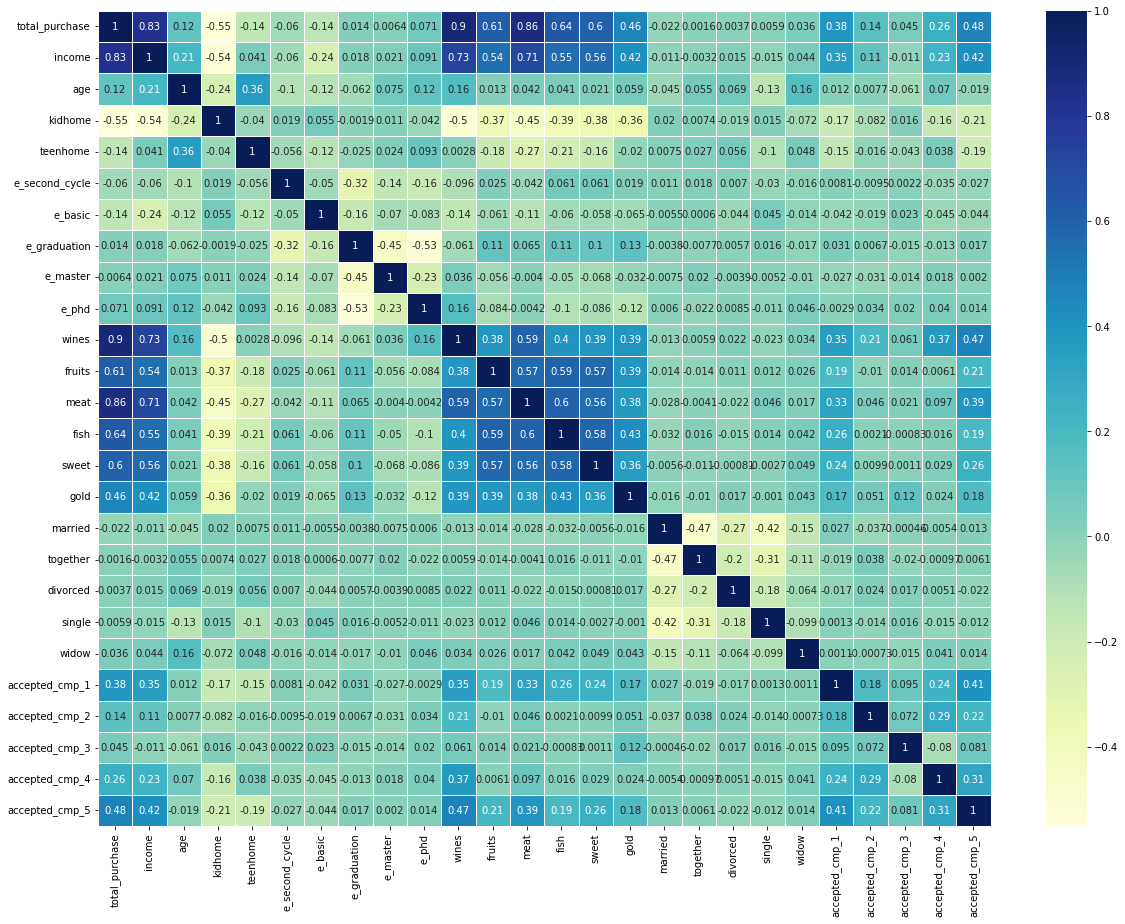

In [51]:
heat_big=data1[['total_purchase','income',"age",'kidhome','teenhome','e_second_cycle', 'e_basic','e_graduation', 'e_master', 'e_phd','wines', 'fruits','meat','fish', 'sweet', 'gold','married','together','divorced', 'single', 'widow', "accepted_cmp_1", "accepted_cmp_2","accepted_cmp_3","accepted_cmp_4","accepted_cmp_5"]]

plt.figure(figsize=(20,15))
sns.heatmap(heat_big.corr(),annot=True, linewidths=.5, cmap="YlGnBu");

In [52]:
heat_big=data1[['total_purchase','income',"age",'kidhome','teenhome','e_second_cycle', 'e_basic','e_graduation', 'e_master', 'e_phd','wines', 'fruits','meat','fish', 'sweet', 'gold','deals_purchases', 'web_purchases','catalog_purcaheses', 'store_purchases', 'web_visit_month','accepted_cmp_1','accepted_cmp_2','accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5','accepted_cmp_overall','married','together','divorced', 'single', 'widow' ]]
heat_big.describe()


,total_purchase,income,age,kidhome,teenhome,e_second_cycle,e_basic,e_graduation,e_master,e_phd,...,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_overall,married,together,divorced,single,widow
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,562.764626,51737.047619,51.095692,0.442177,0.506576,0.089796,0.024490,0.504762,0.165079,0.215873,...,0.013605,0.073923,0.074376,0.073016,0.29932,0.387302,0.257596,0.104308,0.216327,0.034467
std,575.936911,20484.161878,11.705801,0.537132,0.544380,0.285954,0.154599,0.500091,0.371336,0.411520,...,0.115872,0.261705,0.262442,0.260222,0.68044,0.487244,0.437410,0.305730,0.411833,0.182467
min,4.000000,14431.500000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,35196.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,343.000000,51287.000000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,964.000000,68281.000000,61.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2491.000000,113734.000000,80.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000


count for categorical attribute

In [53]:
data1.describe(include=["O"])

,child_st,education_st,marital_st,marital_short,marital_child,marital_child_education
count,2205,2205,2205,2205,2205,2205
unique,2,5,5,2,4,20
top,with_child,e_graduation,married,in_relation,in_relation_with_child,in_relation_with_child_e_graduation
freq,1577,1113,854,1422,1045,523


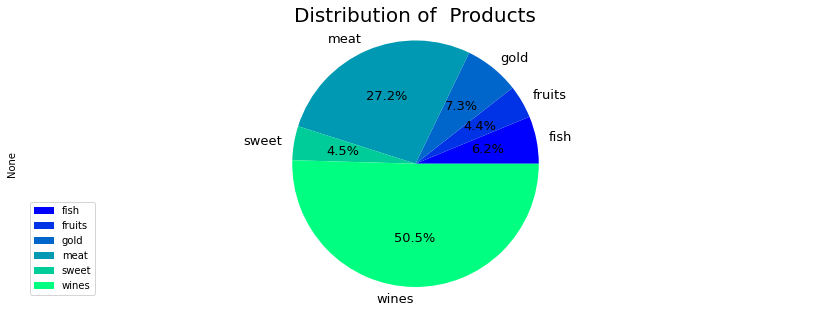

In [54]:
a=data1[['wines', 'fruits',
       'meat', 'fish', 'sweet',
       'gold']].aggregate(np.sum)
a=pd.DataFrame(a)
a.reset_index(inplace=True)
a.rename(columns={0:'total_purchase', "index":"products"}, inplace=True)
a["sum_product"]= data1["total_purchase"].sum()
a["perc"]= 100*a["total_purchase"]/a["sum_product"]





b=data1.pivot_table(['wines', 'fruits',
       'meat', 'fish', 'sweet',
       'gold'] , index='total_purchase', aggfunc="sum").sum()
b=100*b/b.sum()



plt.figure(figsize=(14,5))
b.plot(kind="pie",  fontsize=13, colormap="winter", autopct="%1.1f%%")
plt.legend(loc="lower left")
plt.title('Distribution of  Products', fontsize=20)
plt.axis("equal")
plt.show();


AGE

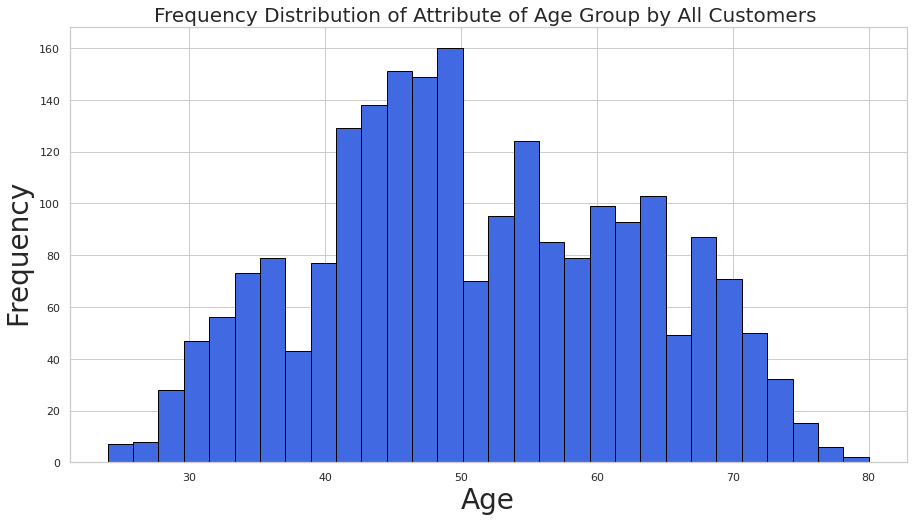

In [55]:
pro_age = data1[np.isfinite(data1['age'])]['age']
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,8))
plt.hist(pro_age.values,  bins=30, color="RoyalBlue",  edgecolor="black")

plt.xlabel('Age', fontsize=28)
plt.ylabel('Frequency  ', fontsize=28)
plt.title('Frequency Distribution of Attribute of Age Group by All Customers ', fontsize=20);


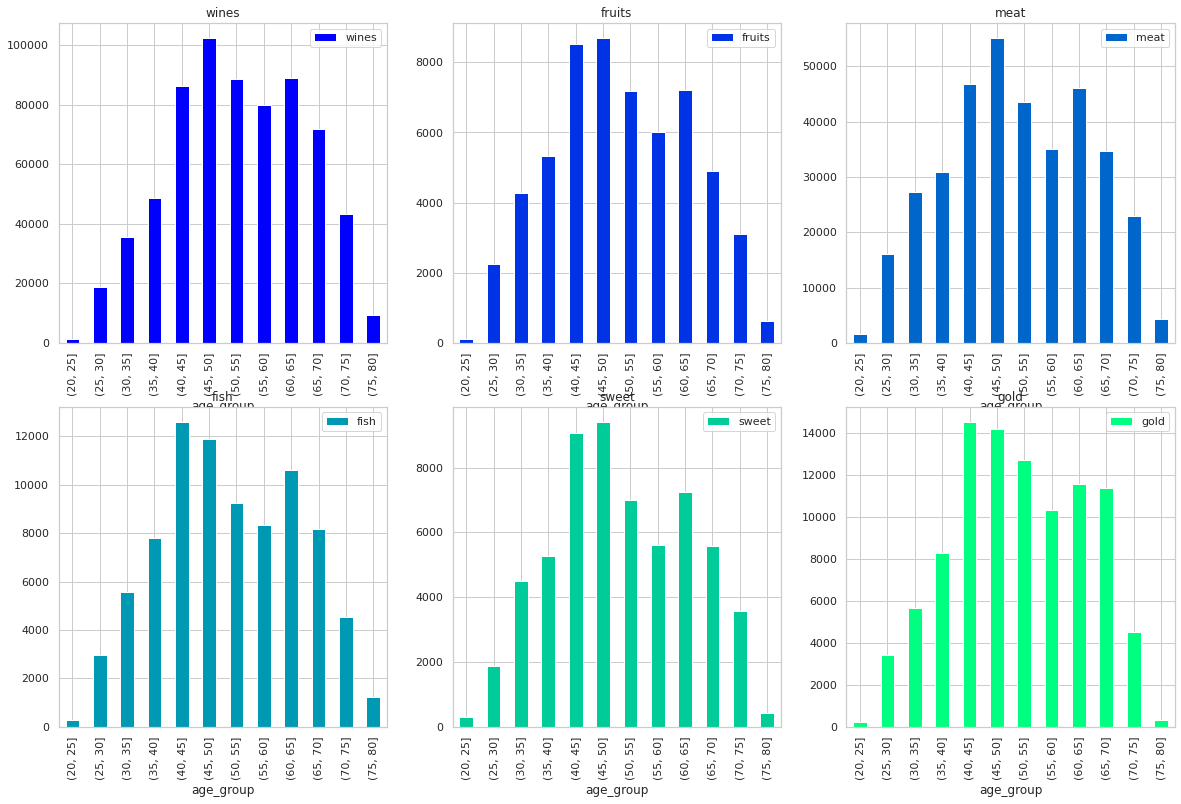

In [56]:
prod_age=data1.groupby('age_group')['wines', 'fruits',
       'meat', 'fish', 'sweet',
       'gold' ].sum()
prod_age.plot.bar(subplots=True,colormap="winter", layout=(3, 3), figsize=(20, 20), sharex=False);

INCOME

income_group,"(14332.198, 24361.75]","(24361.75, 34292.0]","(34292.0, 44222.25]","(44222.25, 54152.5]","(54152.5, 64082.75]","(64082.75, 74013.0]","(74013.0, 83943.25]","(83943.25, 93873.5]","(93873.5, 103803.75]","(103803.75, 113734.0]"
income_band,1,2,3,4,5,6,7,8,9,10


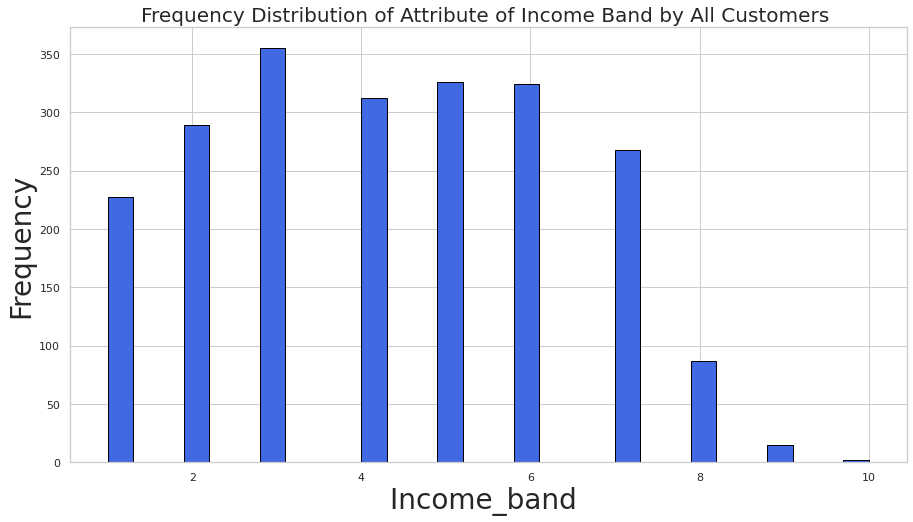

In [57]:
pro_inc = data1[np.isfinite(data1['income_band'])]['income_band']
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,8))
plt.hist(pro_inc.values,  bins=30, color="RoyalBlue",  edgecolor="black")

plt.xlabel('Income_band ', fontsize=28)
plt.ylabel('Frequency', fontsize=28);
plt.title('Frequency Distribution of Attribute of Income Band by All Customers ', fontsize=20);
data1.pivot_table('income_band', index='income_group').sort_values(by="income_band").T

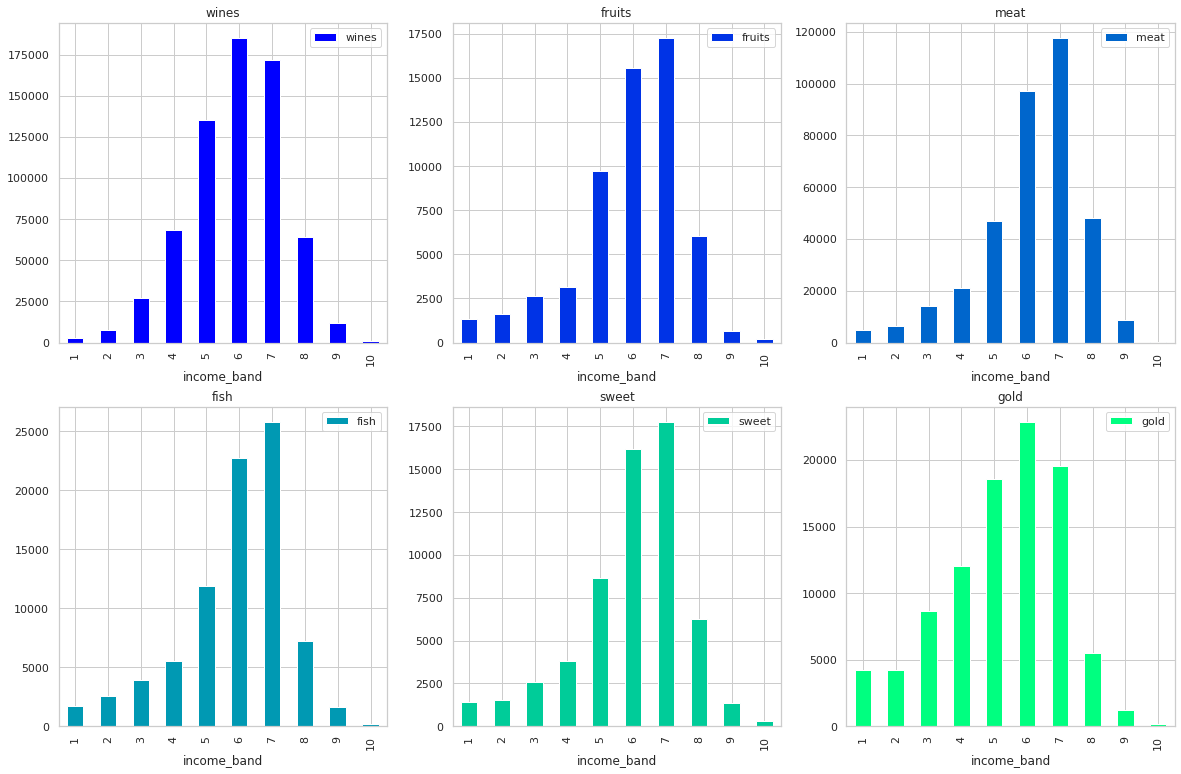

In [58]:
prod_income=data1.groupby('income_band')[ 'wines', 'fruits','meat', 'fish', 'sweet','gold'].sum()
prod_income.plot.bar(subplots=True, colormap="winter", layout=(3, 3), figsize=(20, 20), sharex=False);


CHILD TOTAL

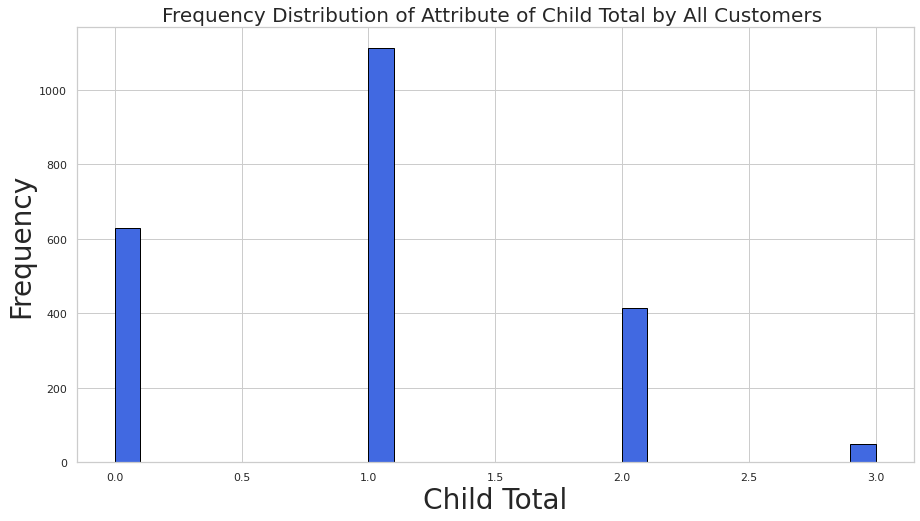

In [59]:
pro_chi = data1[np.isfinite(data1["child_total"])]["child_total"]
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,8))
plt.hist(pro_chi.values,  bins=30, color="RoyalBlue",  edgecolor="black")

plt.xlabel('Child Total', fontsize=28)
plt.ylabel('Frequency', fontsize=28);
plt.title('Frequency Distribution of Attribute of Child Total by All Customers ', fontsize=20);


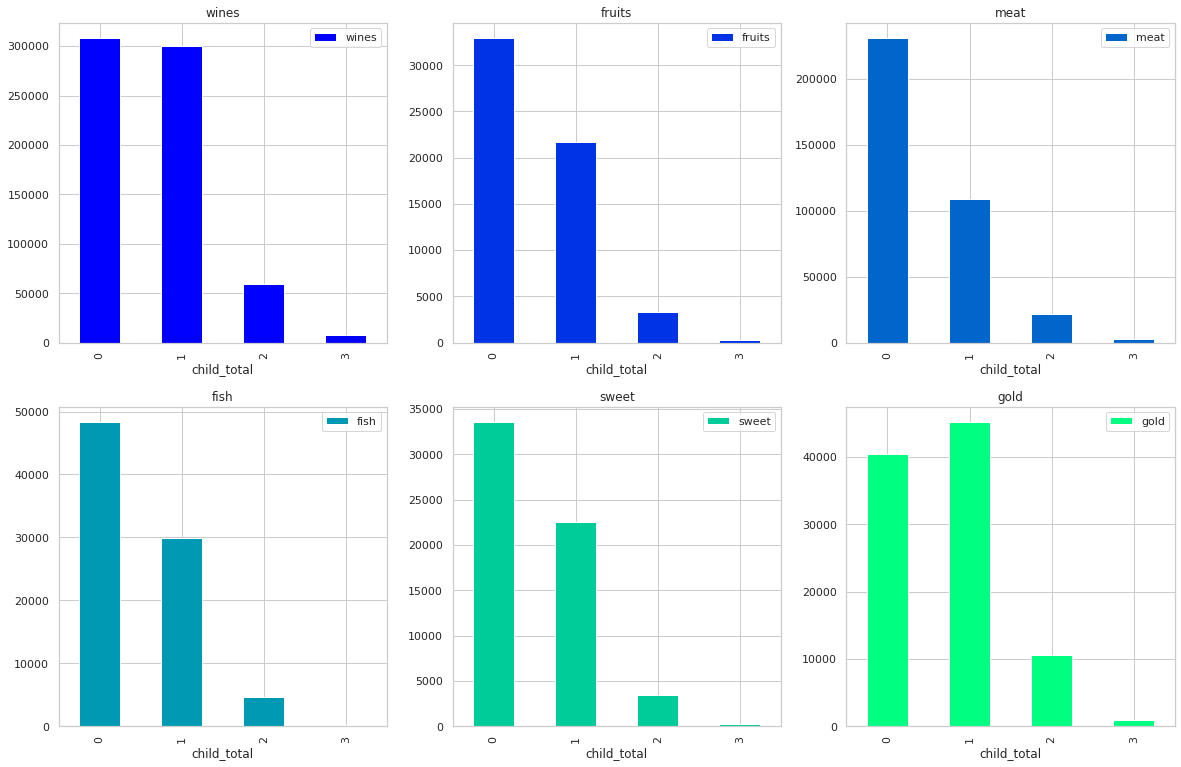

In [60]:
prod_child=data1.groupby('child_total')['wines', 'fruits',
       'meat', 'fish', 'sweet',
       'gold' ].sum()
prod_child.plot.bar(subplots=True,colormap="winter", layout=(3, 3), figsize=(20, 20), sharex=False);

Unified Marital Child Education Status

marital_child_education,in_relation_none_child_e_second_cycle,in_relation_with_child_e_second_cycle,nonrelation_none_child_e_second_cycle,nonrelation_with_child_e_second_cycle,in_relation_none_child_e_graduation,in_relation_with_child_e_graduation,nonrelation_none_child_e_graduation,nonrelation_with_child_e_graduation,in_relation_with_child_e_master,in_relation_none_child_e_master,nonrelation_with_child_e_master,nonrelation_none_child_e_master,in_relation_none_child_e_phd,in_relation_with_child_e_phd,nonrelation_none_child_e_phd,nonrelation_with_child_e_phd,in_relation_none_child_e_basic,in_relation_with_child_e_basic,nonrelation_with_child_e_basic,nonrelation_none_child_e_basic
marital_child_edu_band,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20


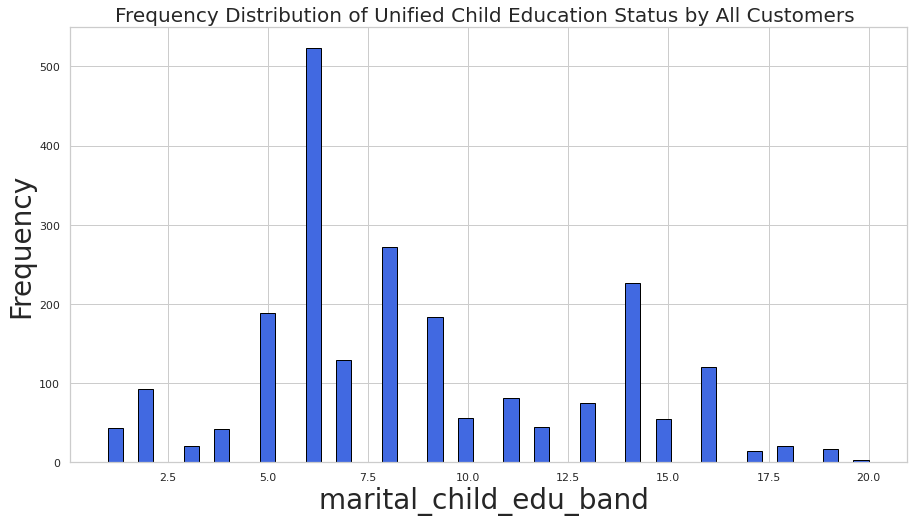

In [61]:
pro_mce = data1[np.isfinite(data1['marital_child_edu_band'])]['marital_child_edu_band']
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,8))
plt.hist(pro_mce.values,  bins=50, color="RoyalBlue",  edgecolor="black")

plt.xlabel('marital_child_edu_band ', fontsize=28)
plt.ylabel('Frequency', fontsize=28);
plt.title('Frequency Distribution of Unified Child Education Status by All Customers ', fontsize=20);
data1.pivot_table('marital_child_edu_band', index='marital_child_education').sort_values(by="marital_child_edu_band").T


In [62]:
data1.pivot_table(['wines', 'fruits',
       'meat', 'fish', 'sweet',
       'gold'], index=["marital_child_edu_band"], aggfunc="sum").sort_values(by="marital_child_edu_band").T

marital_child_edu_band,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
fish,3377,3488,1219,1510,17303,13475,10377,7287,2706,3875,1403,3509,4614,3102,3581,1506,477,224,177,43
fruits,1730,2125,938,1073,10870,10210,7848,5498,1645,3525,862,1769,3348,2530,2611,1037,276,155,156,13
gold,2619,3581,1661,1488,14285,21829,9459,10976,5793,3068,2681,3119,3745,5459,1938,4212,479,362,335,57
meat,10731,5343,7646,3283,74402,51454,47195,26524,13516,20202,5698,20041,31636,19988,18645,7591,306,148,122,42
sweet,2255,2228,1251,1207,11295,10952,7293,5372,2227,2668,800,1900,3536,2235,3054,891,315,173,140,26
wines,11723,11497,8373,8553,87568,118566,54748,57218,44855,31281,18379,26984,53513,73390,33665,34389,270,62,48,11


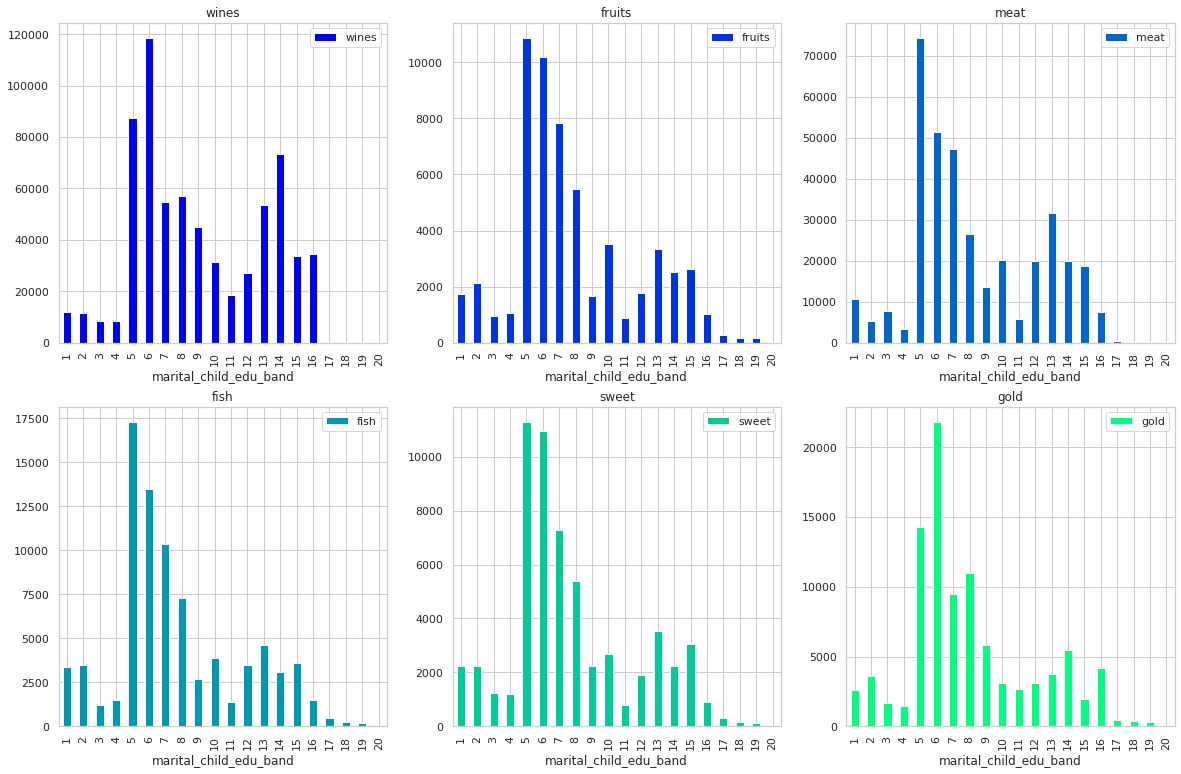

In [63]:
pro_combined=data1.groupby('marital_child_edu_band')['wines', 'fruits',
       'meat', 'fish', 'sweet','gold' ].sum()
pro_combined.plot.bar(subplots=True,colormap="winter", layout=(3, 3), figsize=(20, 20), sharex=False);

WINES

income_band,10,1,2,9,3,8,4,5,7,6
wines,1015,2522,7690,11799,27227,64438,68194,135290,171789,185129


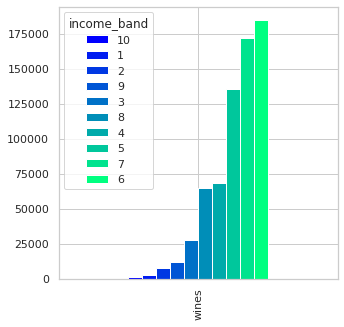

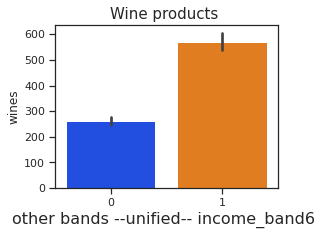

In [64]:
#looking at  wine products income_band_6 status
""" incomeband6= income_band6 of income_band status """

incomewine=data1.pivot_table(["wines"], index=["income_band"], aggfunc="sum").sort_values(by="wines").T
incomewine.plot.bar(subplots=False,colormap="winter", layout=(5, 5), figsize=(5, 5), sharex=False);
incomewine

x=data1["income_band6"]
y=data1["wines"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel('other bands --unified-- income_band6 ', fontsize=16)
plt.title('Wine products ', fontsize=15);
incomewine


In [65]:
# chi-square test
income_wine= data1[["income_band6", "wines"]]

income_wine_crosstab = pd.crosstab(index=income_wine.income_band6, columns=income_wine.wines)
income_wine_table = sm.stats.Table(income_wine_crosstab)
income_wine_rslt = income_wine_table.test_nominal_association()
income_wine_rslt.pvalue

0.999303025154532

it looks like income band6 has some statistically significant for wines purchases.

age_band,1,12,2,3,11,4,10,8,5,7,9,6
wines,1424,9305,18895,35719,43402,48704,71813,79898,86358,88474,88837,102264


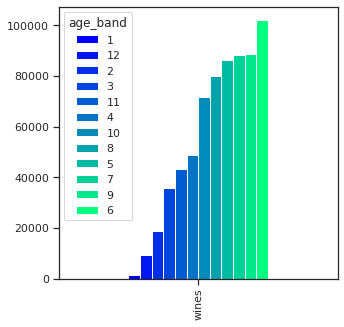

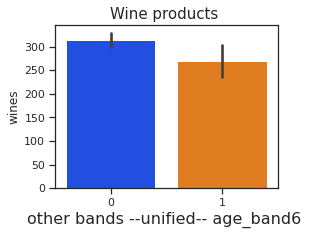

In [66]:
#looking at  wine products age_band6 status
""" age_band6= age_band6 of age_band status """

agemewine=data1.pivot_table(["wines"], index=["age_band"], aggfunc="sum").sort_values(by="wines").T
agemewine.plot.bar(subplots=False,colormap="winter", layout=(5, 5), figsize=(5, 5), sharex=False);
agemewine

x=data1["age_band6"]
y=data1["wines"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel('other bands --unified-- age_band6 ', fontsize=16)
plt.title('Wine products ', fontsize=15);
agemewine

In [67]:
# chi-square test
age_wine= data1[["age_band6", "wines"]]

age_wine_crosstab = pd.crosstab(index=age_wine.age_band6, columns=age_wine.wines)
age_wine_table = sm.stats.Table(age_wine_crosstab)
age_wine_rslt = age_wine_table.test_nominal_association()
age_wine_rslt.pvalue

1.0

it looks like age band6 has some statistically significant for wines purchases.

marital_child_edu_band,20,19,18,17,3,4,2,1,11,12,10,15,16,9,13,7,8,14,5,6
wines,11,48,62,270,8373,8553,11497,11723,18379,26984,31281,33665,34389,44855,53513,54748,57218,73390,87568,118566


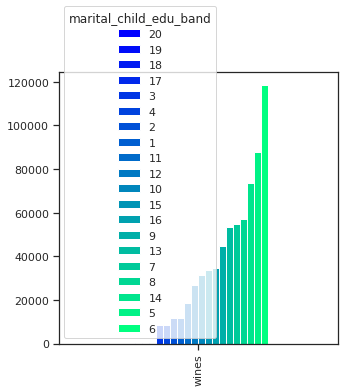

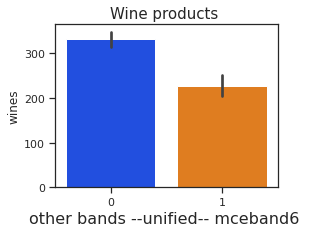

In [68]:
#looking at  wine products through unified marital_child_education_band_6 status
""" mceband6= band6 of marital_child education unified status """
mcewine=data1.pivot_table(["wines"], index=["marital_child_edu_band"], aggfunc="sum").sort_values(by="wines").T

mcewine.plot.bar(subplots=False,colormap="winter",  figsize=(5, 5), sharex=False);



x=data1["band6"]
y=data1["wines"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel('other bands --unified-- mceband6 ', fontsize=16)
plt.title('Wine products ', fontsize=15);
mcewine


In [69]:
# chi-square test
winemce= data1[["band6", "wines"]]

winemce_crosstab = pd.crosstab(index=winemce.band6, columns=winemce.wines)
winemce_table = sm.stats.Table(winemce_crosstab)
winemce_rslt = winemce_table.test_nominal_association()
winemce_rslt.pvalue

1.0

it looks like unified band6 has some statistically significant for wines purchases.

MEATS

income_band,10,1,2,9,3,4,5,8,6,7
meat,107,4847,6442,8603,13986,20922,46820,48225,96983,117578


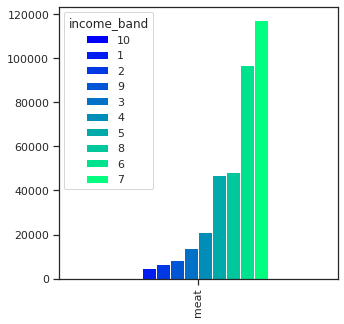

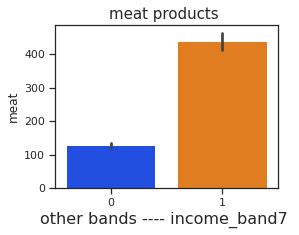

In [70]:
#looking at  meat products income_band_7 status
""" incomeband7= income_band7 of income_band status """

incomemeat=data1.pivot_table(["meat"], index=["income_band"], aggfunc="sum").sort_values(by="meat").T
incomemeat.plot.bar(subplots=False,colormap="winter", figsize=(5, 5), sharex=False);
incomemeat

x=data1["income_band7"]
y=data1["meat"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel('other bands ---- income_band7 ', fontsize=16)
plt.title('meat products ', fontsize=15);
incomemeat


In [71]:
# chi-square test
income_meat= data1[["income_band7", "wines"]]

income_meat_crosstab = pd.crosstab(index=income_meat.income_band7, columns=income_meat.wines)
income_meat_table = sm.stats.Table(income_meat_crosstab)
income_meat_rslt = income_meat_table.test_nominal_association()
income_meat_rslt.pvalue

0.9999188629182595

it looks like income band7 has some statistically significant for wines purchases.

age_band,1,12,2,11,3,4,10,8,7,9,5,6
meat,1631,4291,16121,22988,27222,30829,34693,35115,43643,46168,46750,55062


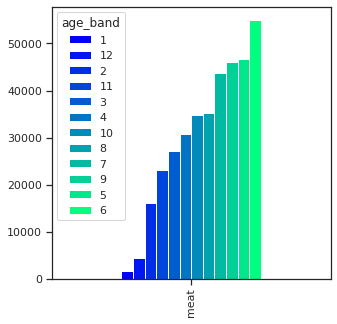

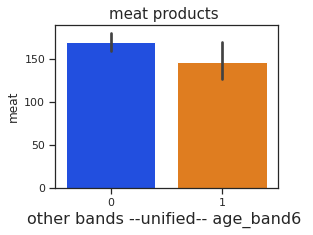

In [72]:
#looking at  meat products through age_band6 status
""" age_band6= age_band6 of age_band status """

agemeat=data1.pivot_table(["meat"], index=["age_band"], aggfunc="sum").sort_values(by="meat").T
agemeat.plot.bar(subplots=False,colormap="winter", layout=(5, 5), figsize=(5, 5), sharex=False);
agemeat

x=data1["age_band6"]
y=data1["meat"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel('other bands --unified-- age_band6 ', fontsize=16)
plt.title('meat products ', fontsize=15);
agemeat

In [73]:
# chi-square test
age_meat= data1[["age_band6", "meat"]]

age_meat_crosstab = pd.crosstab(index=age_meat.age_band6, columns=age_meat.meat)
age_meat_table = sm.stats.Table(age_meat_crosstab)
age_meat_rslt = age_meat_table.test_nominal_association()
age_meat_rslt.pvalue

1.0

it looks like age band6 has some statistically significant for meat purchases.

marital_child_edu_band,20,19,18,17,4,2,11,16,3,1,9,15,14,12,10,8,13,7,6,5
meat,42,122,148,306,3283,5343,5698,7591,7646,10731,13516,18645,19988,20041,20202,26524,31636,47195,51454,74402


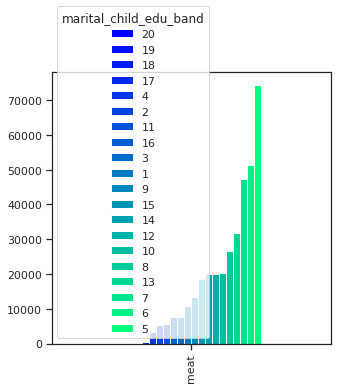

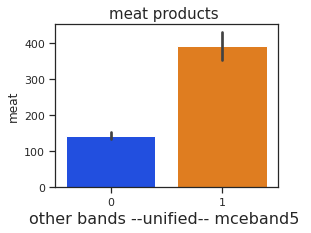

In [74]:
#looking at  meat products through unified marital_child_education_band_5 status
""" mceband5= band5 of marital_child education unified status """
mcemeat=data1.pivot_table(["meat"], index=["marital_child_edu_band"], aggfunc="sum").sort_values(by="meat").T

mcemeat.plot.bar(subplots=False,colormap="winter",  figsize=(5, 5), sharex=False);



x=data1["band5"]
y=data1["meat"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel('other bands --unified-- mceband5 ', fontsize=16)
plt.title('meat products ', fontsize=15);
mcemeat


In [75]:
# chi-square test
meatmce= data1[["band5", "meat"]]

meatmce_crosstab = pd.crosstab(index=meatmce.band5, columns=meatmce.meat)
meatmce_table = sm.stats.Table(meatmce_crosstab)
meatmce_rslt = meatmce_table.test_nominal_association()
meatmce_rslt.pvalue

0.5487059320019883

it looks like unified band5 has some statistically significant for meat purchases.

FISH

income_band,10,9,1,2,3,4,8,5,6,7
fish,203,1612,1744,2577,3948,5539,7201,11863,22750,25816


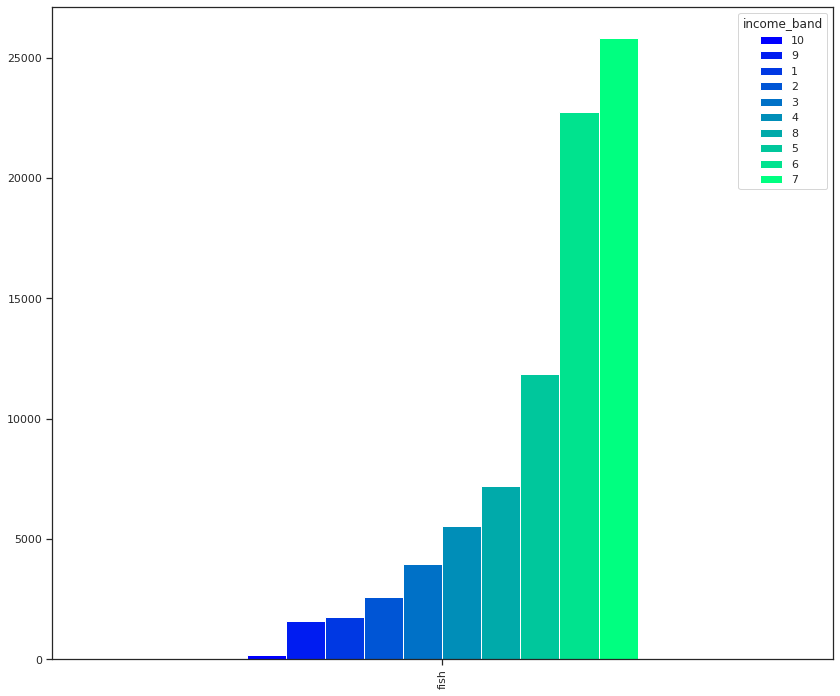

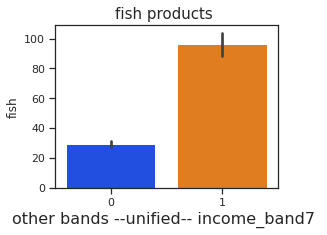

In [76]:
#looking at  fish products income_band_7 status
""" incomeband7= income_band7 of income_band status """

incomefish=data1.pivot_table(["fish"], index=["income_band"], aggfunc="sum").sort_values(by="fish").T
incomefish.plot.bar(subplots=False,colormap="winter",  sharex=False);
incomefish

x=data1["income_band7"]
y=data1["fish"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel('other bands --unified-- income_band7 ', fontsize=16)
plt.title('fish products ', fontsize=15);
incomefish


In [77]:
# chi-square test
income_fish= data1[["income_band7", "fish"]]

income_fish_crosstab = pd.crosstab(index=income_fish.income_band7, columns=income_fish.fish)
income_fish_table = sm.stats.Table(income_fish_crosstab)
income_fish_rslt = income_fish_table.test_nominal_association()
income_fish_rslt.pvalue

0.0

it looks like income band7 hasn't statistically significant for fish purchases.

age_band,1,12,2,11,3,4,10,8,7,9,6,5
fish,270,1228,2975,4547,5556,7781,8190,8342,9239,10628,11905,12592


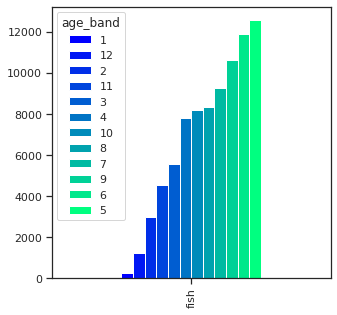

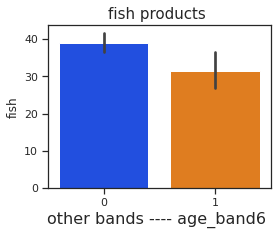

In [78]:
#looking at  fish products through age_band6 status
""" age_band6= age_band6 of age_band status """

agefish=data1.pivot_table(["fish"], index=["age_band"], aggfunc="sum").sort_values(by="fish").T
agefish.plot.bar(subplots=False,colormap="winter", layout=(5, 5), figsize=(5, 5), sharex=False);
agefish

x=data1["age_band6"]
y=data1["fish"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel('other bands ---- age_band6 ', fontsize=16)
plt.title('fish products ', fontsize=15);
agefish

In [79]:
# chi-square test
age_fish= data1[["age_band6", "fish"]]

age_fish_crosstab = pd.crosstab(index=age_fish.age_band6, columns=age_fish.fish)
age_fish_table = sm.stats.Table(age_fish_crosstab)
age_fish_rslt = age_fish_table.test_nominal_association()
age_fish_rslt.pvalue

0.9996450484435928

it looks like age band6 has some statistically significant for fish purchases.

marital_child_edu_band,20,19,18,17,3,11,16,4,9,14,1,2,12,15,10,13,8,7,6,5
fish,43,177,224,477,1219,1403,1506,1510,2706,3102,3377,3488,3509,3581,3875,4614,7287,10377,13475,17303


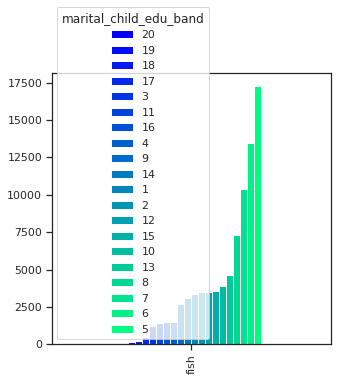

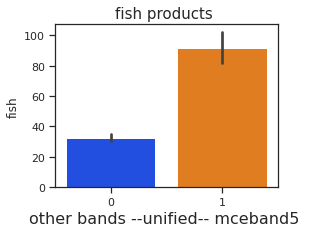

In [80]:
#looking at  fish products through unified marital_child_education_band_5 status
""" mceband5= band5 of marital_child education unified status """
mcefish=data1.pivot_table(["fish"], index=["marital_child_edu_band"], aggfunc="sum").sort_values(by="fish").T

mcefish.plot.bar(subplots=False,colormap="winter",  figsize=(5, 5), sharex=False);



x=data1["band5"]
y=data1["fish"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel('other bands --unified-- mceband5 ', fontsize=16)
plt.title('fish products ', fontsize=15);
mcefish


In [81]:
# chi-square test
fishmce= data1[["band5", "fish"]]

fishmce_crosstab = pd.crosstab(index=fishmce.band5, columns=fishmce.fish)
fishmce_table = sm.stats.Table(fishmce_crosstab)
fishmce_rslt =fishmce_table.test_nominal_association()
fishmce_rslt.pvalue

0.0

it looks like unified band5 hasn't statistically significant for fish purchases.

FRUIT

income_band,10,9,1,2,3,4,8,5,6,7
fruits,183,675,1341,1593,2648,3137,6062,9754,15563,17263


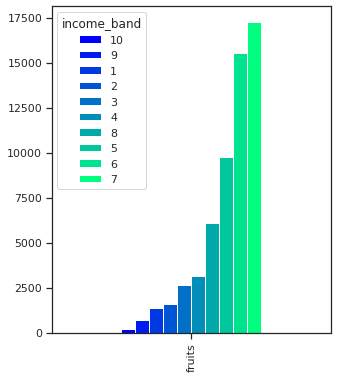

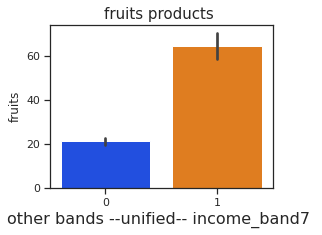

In [82]:
#looking at  fruits products income_band_7 status
""" incomeband7= income_band7 of income_band status """

incomefruits=data1.pivot_table(["fruits"], index=["income_band"], aggfunc="sum").sort_values(by="fruits").T
incomefruits.plot.bar(subplots=False,colormap="winter", figsize = (5,6), sharex=False);
incomefruits

x=data1["income_band7"]
y=data1["fruits"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel('other bands --unified-- income_band7 ', fontsize=16)
plt.title('fruits products ', fontsize=15);
incomefruits


In [83]:
# chi-square test
income_fruits= data1[["income_band7", "fruits"]]

income_fruits_crosstab = pd.crosstab(index=income_fruits.income_band7, columns=income_fruits.fruits)
income_fruits_table = sm.stats.Table(income_fruits_crosstab)
income_fruits_rslt = income_fruits_table.test_nominal_association()
income_fruits_rslt.pvalue

0.0

it looks like income band7 hasn't statistically significant for fruits purchases.

age_band,1,12,2,11,3,10,4,8,7,9,5,6
fruits,117,613,2243,3096,4282,4910,5329,6024,7177,7225,8521,8682


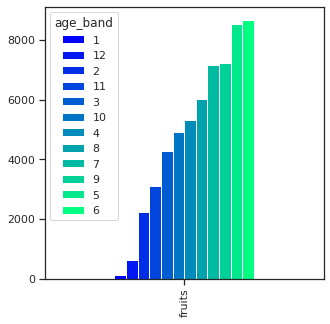

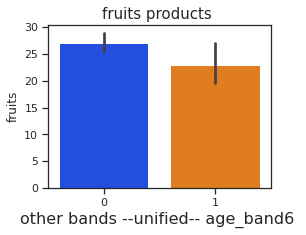

In [84]:
#looking at  fruits products through age_band6 status
""" age_band6= age_band6 of age_band status """

agefruits=data1.pivot_table(["fruits"], index=["age_band"], aggfunc="sum").sort_values(by="fruits").T
agefruits.plot.bar(subplots=False,colormap="winter", layout=(5, 5), figsize=(5, 5), sharex=False);
agefruits

x=data1["age_band6"]
y=data1["fruits"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel('other bands --unified-- age_band6 ', fontsize=16)
plt.title('fruits products ', fontsize=15);
agefruits

In [85]:
# chi-square test
age_fruits= data1[["age_band6", "fruits"]]

age_fruits_crosstab = pd.crosstab(index=age_fruits.age_band6, columns=age_fruits.fruits)
age_fruits_table = sm.stats.Table(age_fruits_crosstab)
age_fruits_rslt = age_fruits_table.test_nominal_association()
age_fruits_rslt.pvalue

0.9966640939734963

it looks like age band6 has some statistically significant for fruits purchases.

marital_child_edu_band,20,18,19,17,11,3,16,4,9,1,12,2,14,15,13,10,8,7,6,5
fruits,13,155,156,276,862,938,1037,1073,1645,1730,1769,2125,2530,2611,3348,3525,5498,7848,10210,10870


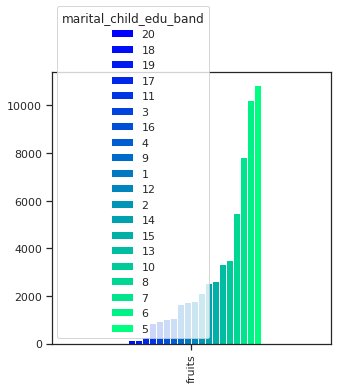

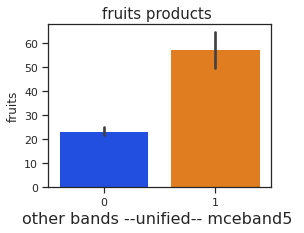

In [86]:
#looking at  fruits products through unified marital_child_education_band_5 status
""" mceband5= band5 of marital_child education unified status """
mcefruits=data1.pivot_table(["fruits"], index=["marital_child_edu_band"], aggfunc="sum").sort_values(by="fruits").T

mcefruits.plot.bar(subplots=False,colormap="winter",  figsize=(5, 5), sharex=False);
mcefruits


x=data1["band5"]
y=data1["fruits"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel('other bands --unified-- mceband5 ', fontsize=16)
plt.title('fruits products ', fontsize=15);
mcefruits


In [87]:
# chi-square test
fruitsmce= data1[["band5", "fruits"]]

fruitsmce_crosstab = pd.crosstab(index=fruitsmce.band5, columns=fruitsmce.fruits)
fruitsmce_table = sm.stats.Table(fruitsmce_crosstab)
fruitsmce_rslt =fruitsmce_table.test_nominal_association()
fruitsmce_rslt.pvalue

0.0

it looks like unified band5 hasn't statistically significant for fruits purchases.

SWEET

income_band,10,9,1,2,3,4,8,5,6,7
sweet,283,1342,1427,1532,2588,3795,6247,8660,16168,17776


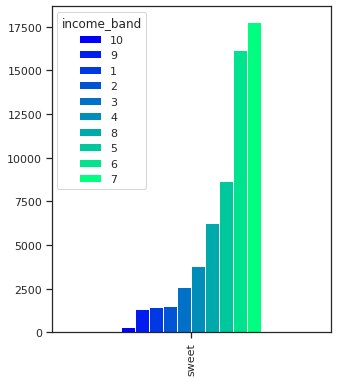

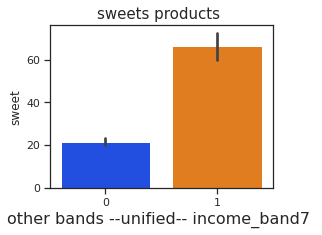

In [88]:
#looking at  sweets products income_band_7 status
""" incomeband7= income_band7 of income_band status """

incomesweets=data1.pivot_table(["sweet"], index=["income_band"], aggfunc="sum").sort_values(by="sweet").T
incomesweets.plot.bar(subplots=False,colormap="winter", figsize = (5,6), sharex=False);


x=data1["income_band7"]
y=data1["sweet"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel('other bands --unified-- income_band7 ', fontsize=16)
plt.title('sweets products ', fontsize=15);
incomesweets


In [89]:
# chi-square test
income_sweet= data1[["income_band7", "sweet"]]

income_sweet_crosstab = pd.crosstab(index=income_sweet.income_band7, columns=income_sweet.sweet)
income_sweet_table = sm.stats.Table(income_sweet_crosstab)
income_sweet_rslt = income_sweet_table.test_nominal_association()
income_sweet_rslt.pvalue

0.0

it looks like income band7 hasn't statistically significant for sweet purchases.

age_band,1,12,2,11,3,4,10,8,7,9,5,6
sweet,293,433,1868,3581,4487,5267,5569,5612,6996,7256,9054,9402


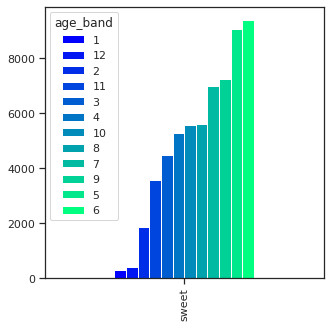

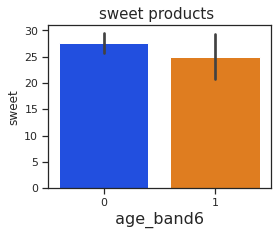

In [90]:
#looking at  sweet products through age_band6 status
""" age_band6= age_band6 of age_band status """

agesweet=data1.pivot_table(["sweet"], index=["age_band"], aggfunc="sum").sort_values(by="sweet").T
agesweet.plot.bar(subplots=False,colormap="winter", layout=(5, 5), figsize=(5, 5), sharex=False);
agesweet

x=data1["age_band6"]
y=data1["sweet"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel(' age_band6 ', fontsize=16)
plt.title('sweet products ', fontsize=15);
agesweet

In [91]:
# chi-square test
age_sweet= data1[["age_band6", "sweet"]]

age_sweet_crosstab = pd.crosstab(index=age_sweet.age_band6, columns=age_sweet.sweet)
age_sweet_table = sm.stats.Table(age_sweet_crosstab)
age_sweet_rslt = age_sweet_table.test_nominal_association()
age_sweet_rslt.pvalue

0.9987856105748864

it looks like age band6 has some statistically significant for sweet purchases.

marital_child_edu_band,20,19,18,17,11,16,4,3,12,9,2,14,1,10,15,13,8,7,6,5
sweet,26,140,173,315,800,891,1207,1251,1900,2227,2228,2235,2255,2668,3054,3536,5372,7293,10952,11295


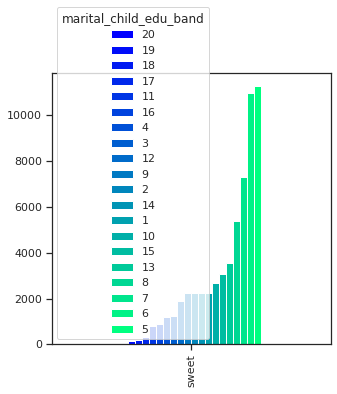

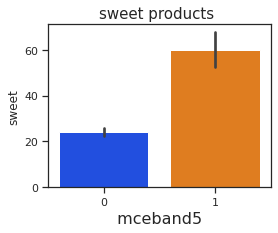

In [92]:
#looking at  sweet products through unified marital_child_education_band_5 status
""" mceband5= band5 of marital_child education unified status """
mcesweet=data1.pivot_table(["sweet"], index=["marital_child_edu_band"], aggfunc="sum").sort_values(by="sweet").T

mcesweet.plot.bar(subplots=False,colormap="winter",  figsize=(5, 5), sharex=False);
mcesweet


x=data1["band5"]
y=data1["sweet"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel(' mceband5 ', fontsize=16)
plt.title('sweet products ', fontsize=15);
mcesweet


In [93]:
# chi-square test
sweetmce= data1[["band5", "sweet"]]

sweetmce_crosstab = pd.crosstab(index=sweetmce.band5, columns=sweetmce.sweet)
sweetmce_table = sm.stats.Table(sweetmce_crosstab)
sweetmce_rslt =sweetmce_table.test_nominal_association()
sweetmce_rslt.pvalue

0.0

it looks like unified band5 hasn't statistically significant for sweet purchases.

GOLD

income_band,10,9,1,2,8,3,4,5,7,6
gold,210,1241,4218,4238,5472,8657,12041,18613,19578,22878


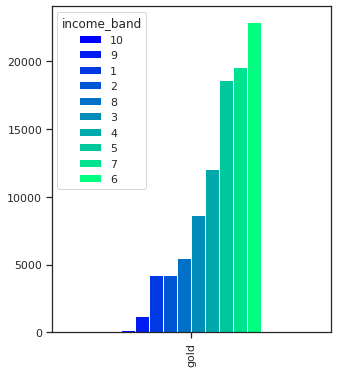

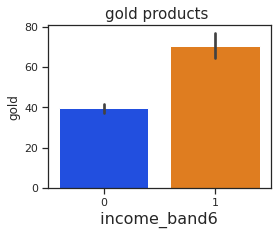

In [94]:
#looking at  gold products income_band_6 status
""" incomeband6= income_band6 of income_band status """

incomegold=data1.pivot_table(["gold"], index=["income_band"], aggfunc="sum").sort_values(by="gold").T
incomegold.plot.bar(subplots=False,colormap="winter", figsize = (5,6), sharex=False);


x=data1["income_band6"]
y=data1["gold"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel(' income_band6 ', fontsize=16)
plt.title('gold products ', fontsize=15);
incomegold


In [95]:
# chi-square test
income_gold= data1[["income_band6", "gold"]]

income_gold_crosstab = pd.crosstab(index=income_gold.income_band6, columns=income_gold.gold)
income_gold_table = sm.stats.Table(income_gold_crosstab)
income_gold_rslt = income_gold_table.test_nominal_association()
income_gold_rslt.pvalue

3.186340080674199e-14

it looks like income band6 has some statistically significant for gold purchases.

age_band,1,12,2,11,3,4,8,10,9,7,6,5
gold,209,337,3399,4507,5663,8291,10346,11381,11562,12709,14215,14527


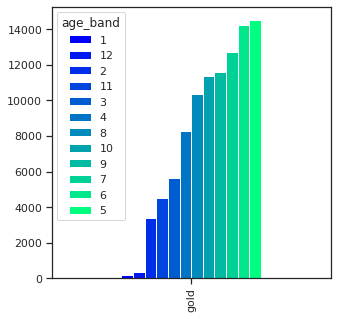

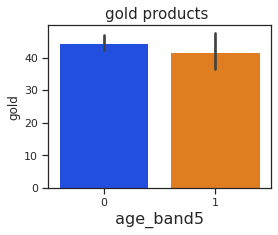

In [96]:
#looking at  gold products through age_band5 status
""" age_band5= age_band5 of age_band status """

agegold=data1.pivot_table(["gold"], index=["age_band"], aggfunc="sum").sort_values(by="gold").T
agegold.plot.bar(subplots=False,colormap="winter", layout=(5, 5), figsize=(5, 5), sharex=False);
agegold

x=data1["age_band5"]
y=data1["gold"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel(' age_band5 ', fontsize=16)
plt.title('gold products ', fontsize=15);
agegold

In [97]:
# chi-square test
age_gold= data1[["age_band5", "gold"]]

age_gold_crosstab = pd.crosstab(index=age_gold.age_band5, columns=age_gold.gold)
age_gold_table = sm.stats.Table(age_gold_crosstab)
age_gold_rslt = age_gold_table.test_nominal_association()
age_gold_rslt.pvalue

0.9997484263546254

it looks like age band5 has some statistically significant for gold purchases.

marital_child_edu_band,20,19,18,17,4,3,15,1,11,10,12,2,13,16,14,9,7,8,5,6
gold,57,335,362,479,1488,1661,1938,2619,2681,3068,3119,3581,3745,4212,5459,5793,9459,10976,14285,21829


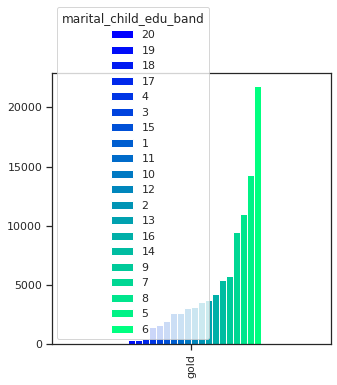

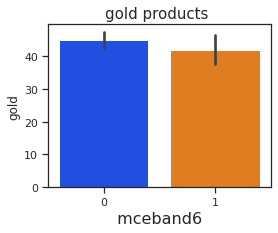

In [98]:
#looking at  gold products through unified marital_child_education_band_6 status
""" mceband6= band6 of marital_child education unified status """
mcegold=data1.pivot_table(["gold"], index=["marital_child_edu_band"], aggfunc="sum").sort_values(by="gold").T

mcegold.plot.bar(subplots=False,colormap="winter",  figsize=(5, 5), sharex=False);
mcegold


x=data1["band6"]
y=data1["gold"]

fig = plt.figure(figsize = (4,3))
sns.set(style="ticks", color_codes=True)
sns.barplot(x, y,   orient="v", palette="bright")
plt.xlabel(' mceband6 ', fontsize=16)
plt.title('gold products ', fontsize=15);
mcegold


In [99]:
# chi-square test
goldmce= data1[["band6", "gold"]]

goldmce_crosstab = pd.crosstab(index=goldmce.band6, columns=goldmce.gold)
goldmce_table = sm.stats.Table(goldmce_crosstab)
goldmce_rslt =goldmce_table.test_nominal_association()
goldmce_rslt.pvalue

0.9963120461464557

it looks like unified band6 has some statistically significant for gold purchases.

CAMPAIGN1 & PRODUCTS

accepted_cmp_1,1,0
fish,13116,70137
fruits,7884,50335
gold,11026,86120
meat,61811,302702
sweet,9300,50518
wines,107640,567453


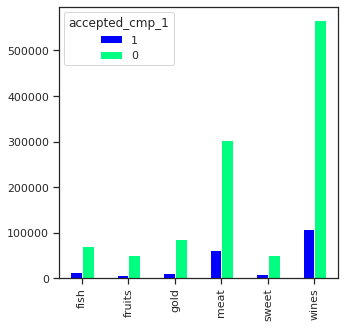

In [100]:
cmp1_pro=data1.pivot_table(["gold",'wines', 'fruits', 'meat','fish', 'sweet'], index=["accepted_cmp_1"], aggfunc="sum").sort_values(by="gold").T

cmp1_pro.plot.bar(subplots=False,colormap="winter",  figsize=(5, 5), sharex=False);
cmp1_pro

In [101]:
# chi-square test
cmp_1_wines= data1[["accepted_cmp_1", "wines"]]

cmp_1_wines_crosstab = pd.crosstab(index=cmp_1_wines.accepted_cmp_1, columns=cmp_1_wines.wines)
cmp_1_wines_table = sm.stats.Table(cmp_1_wines_crosstab)
cmp_1_wines_rslt =cmp_1_wines_table.test_nominal_association()
cmp_1_wines_rslt.pvalue

1.0

**it looks like campaign1 has some statistically significant for wine purchases.

In [102]:
# chi-square test
cmp_1_meat= data1[["accepted_cmp_1", "meat"]]

cmp_1_meat_crosstab = pd.crosstab(index=cmp_1_meat.accepted_cmp_1, columns=cmp_1_meat.meat)
cmp_1_meat_table = sm.stats.Table(cmp_1_meat_crosstab)
cmp_1_meat_rslt =cmp_1_meat_table.test_nominal_association()
cmp_1_meat_rslt.pvalue

0.6950940859327849

it looks like campaign1 has some statistically significant for meat purchases.

CAMPAIGN2 & PRODUCTS

accepted_cmp_2,1,0
fish,1162,82091
fruits,689,57530
gold,1992,95154
meat,7509,357004
sweet,918,58900
wines,26960,648133


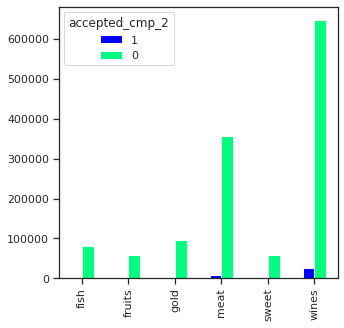

In [103]:
cmp2_pro=data1.pivot_table(["gold",'wines', 'fruits', 'meat','fish', 'sweet'], index=["accepted_cmp_2"], aggfunc="sum").sort_values(by="gold").T

cmp2_pro.plot.bar(subplots=False,colormap="winter",  figsize=(5, 5), sharex=False);
cmp2_pro

In [104]:
# chi-square test
cmp_2_wines= data1[["accepted_cmp_2", "wines"]]

cmp_2_wines_crosstab = pd.crosstab(index=cmp_2_wines.accepted_cmp_2, columns=cmp_2_wines.wines)
cmp_2_wines_table = sm.stats.Table(cmp_2_wines_crosstab)
cmp_2_wines_rslt =cmp_2_wines_table.test_nominal_association()
cmp_2_wines_rslt.pvalue

1.0

it looks like campaign2 has some statistically significant for wine purchases.

CAMPAIGN3 & PRODUCTS

accepted_cmp_3,1,0
fish,6128,77125
fruits,4628,53591
gold,10911,86235
meat,29612,334901
sweet,4448,55370
wines,61721,613372


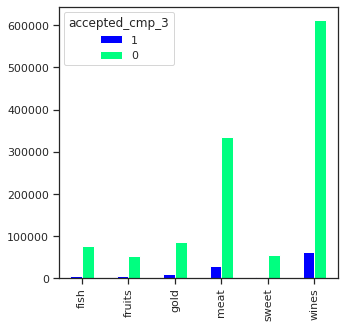

In [105]:
cmp3_pro=data1.pivot_table(["gold",'wines', 'fruits', 'meat','fish', 'sweet'], index=["accepted_cmp_3"], aggfunc="sum").sort_values(by="gold").T

cmp3_pro.plot.bar(subplots=False,colormap="winter",  figsize=(5, 5), sharex=False);
cmp3_pro

In [106]:
# chi-square test
cmp_3_wines= data1[["accepted_cmp_3", "wines"]]

cmp_3_wines_crosstab = pd.crosstab(index=cmp_3_wines.accepted_cmp_3, columns=cmp_3_wines.wines)
cmp_3_wines_table = sm.stats.Table(cmp_3_wines_crosstab)
cmp_3_wines_rslt =cmp_3_wines_table.test_nominal_association()
cmp_3_wines_rslt.pvalue

1.0

it looks like campaign3 has some statistically significant for wine purchases.

In [107]:
# chi-square test
cmp_3_meat= data1[["accepted_cmp_3", "meat"]]

cmp_3_meat_crosstab = pd.crosstab(index=cmp_3_meat.accepted_cmp_3, columns=cmp_3_meat.meat)
cmp_3_meat_table = sm.stats.Table(cmp_3_meat_crosstab)
cmp_3_meat_rslt =cmp_3_meat_table.test_nominal_association()
cmp_3_meat_rslt.pvalue

1.0

it looks like campaign3 has some statistically significant for meat purchases.

CAMPAIGN4 & PRODUCTS

accepted_cmp_4,1,0
fish,6684,76569
fruits,4470,53749
gold,7932,89214
meat,39305,325208
sweet,5131,54687
wines,123038,552055


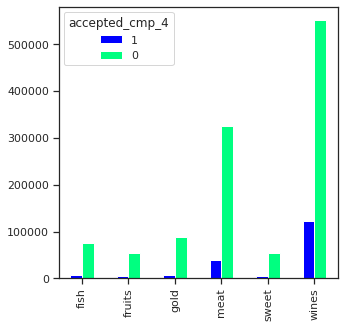

In [108]:
cmp4_pro=data1.pivot_table(["gold",'wines', 'fruits', 'meat','fish', 'sweet'], index=["accepted_cmp_4"], aggfunc="sum").sort_values(by="gold").T

cmp4_pro.plot.bar(subplots=False,colormap="winter",  figsize=(5, 5), sharex=False);
cmp4_pro

In [109]:
# chi-square test
cmp_4_wines= data1[["accepted_cmp_4", "wines"]]

cmp_4_wines_crosstab = pd.crosstab(index=cmp_4_wines.accepted_cmp_4, columns=cmp_4_wines.wines)
cmp_4_wines_table = sm.stats.Table(cmp_4_wines_crosstab)
cmp_4_wines_rslt =cmp_4_wines_table.test_nominal_association()
cmp_4_wines_rslt.pvalue

0.9999999999999886

it looks like campaign4 has some statistically significant for wine purchases.

In [110]:
# chi-square test
cmp_4_meat= data1[["accepted_cmp_4", "meat"]]

cmp_4_meat_crosstab = pd.crosstab(index=cmp_4_meat.accepted_cmp_4, columns=cmp_4_meat.meat)
cmp_4_meat_table = sm.stats.Table(cmp_4_meat_crosstab)
cmp_4_meat_rslt =cmp_4_meat_table.test_nominal_association()
cmp_4_meat_rslt.pvalue

0.9999899942885908

**it looks like campaign4 has some statistically significant for meat purchases.

CAMPAIGN5 & PRODUCTS

accepted_cmp_5,1,0
fish,12191,71062
fruits,9011,49208
gold,12319,84827
meat,75238,289275
sweet,10455,49363
wines,140795,534298


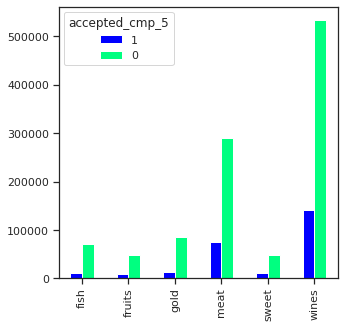

In [111]:
cmp5_pro=data1.pivot_table(["gold",'wines', 'fruits', 'meat','fish', 'sweet'], index=["accepted_cmp_5"], aggfunc="sum").sort_values(by="gold").T

cmp5_pro.plot.bar(subplots=False,colormap="winter",  figsize=(5, 5), sharex=False);
cmp5_pro

In [112]:
# chi-square test
cmp_5_wines= data1[["accepted_cmp_5", "wines"]]

cmp_5_wines_crosstab = pd.crosstab(index=cmp_5_wines.accepted_cmp_5, columns=cmp_5_wines.wines)
cmp_5_wines_table = sm.stats.Table(cmp_5_wines_crosstab)
cmp_5_wines_rslt =cmp_5_wines_table.test_nominal_association()
cmp_5_wines_rslt.pvalue

0.9999999999998356

it looks like campaign5 has some statistically significant for wine purchases.

In [113]:
# chi-square test
cmp_5_meat= data1[["accepted_cmp_5", "meat"]]

cmp_5_meat_crosstab = pd.crosstab(index=cmp_5_meat.accepted_cmp_5, columns=cmp_5_meat.meat)
cmp_5_meat_table = sm.stats.Table(cmp_5_meat_crosstab)
cmp_5_meat_rslt =cmp_5_meat_table.test_nominal_association()
cmp_5_meat_rslt.pvalue

0.07569300174773297

it looks like campaign5 has some statistically significant for meat purchases.

just looking for meat and wine purcheses

In [114]:
# chi-square test
meat_wines= data1[["meat", "wines"]]

meat_wines_crosstab = pd.crosstab(index=meat_wines.meat, columns=meat_wines.wines)
meat_wines_table = sm.stats.Table(meat_wines_crosstab)
meat_wines_rslt =meat_wines_table.test_nominal_association()
meat_wines_rslt.pvalue

1.0

it looks like meat purchase has some statistically significant for wine purchases.

just looking for gold and wine purcheses

In [115]:
# chi-square test
gold_wines= data1[["gold", "wines"]]

gold_wines_crosstab = pd.crosstab(index=gold_wines.gold, columns=gold_wines.wines)
gold_wines_table = sm.stats.Table(gold_wines_crosstab)
gold_wines_rslt =gold_wines_table.test_nominal_association()
gold_wines_rslt.pvalue

1.0

it looks like gold purchase has some statistically significant for wine purchases.

just looking for fish and wine purcheses

In [116]:
# chi-square test
fish_wines= data1[["fish", "wines"]]

fish_wines_crosstab = pd.crosstab(index=fish_wines.fish, columns=fish_wines.wines)
fish_wines_table = sm.stats.Table(fish_wines_crosstab)
fish_wines_rslt =fish_wines_table.test_nominal_association()
fish_wines_rslt.pvalue

1.0

it looks like fish purchase has some statistically significant for wine purchases.

Conclusion of EDA

There is no strong correlation among the numeric attributes.

There is neither strong positive nor strong negative correlation present in any variable exclude total purchases and income.

